In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pickle

name1 = "/content/drive/MyDrive/BTP/Datasets/Severson/batch1.pkl"
name2 = "/content/drive/MyDrive/BTP/Datasets/Severson/batch2.pkl"
name3 = "/content/drive/MyDrive/BTP/Datasets/Severson/batch3.pkl"
with open(name1, "rb") as f:
  try:
    data1 = pickle.load(f)
  except Exception:
    raise Exception("Unable to load the dataset, please check for necessary permissions.")

with open(name2, "rb") as f:
  try:
    data2 = pickle.load(f)
  except Exception:
    raise Exception("Unable to load the dataset, please check for necessary permissions.")

with open(name3, "rb") as f:
  try:
    data3 = pickle.load(f)
  except Exception:
    raise Exception("Unable to load the dataset, please check for necessary permissions.")

In [3]:
print(data1.keys())
print(data2.keys())
print(data3.keys())

dict_keys(['b1c0', 'b1c1', 'b1c2', 'b1c3', 'b1c4', 'b1c5', 'b1c6', 'b1c7', 'b1c8', 'b1c9', 'b1c10', 'b1c11', 'b1c12', 'b1c13', 'b1c14', 'b1c15', 'b1c16', 'b1c17', 'b1c18', 'b1c19', 'b1c20', 'b1c21', 'b1c22', 'b1c23', 'b1c24', 'b1c25', 'b1c26', 'b1c27', 'b1c28', 'b1c29', 'b1c30', 'b1c31', 'b1c32', 'b1c33', 'b1c34', 'b1c35', 'b1c36', 'b1c37', 'b1c38', 'b1c39', 'b1c40', 'b1c41', 'b1c42', 'b1c43', 'b1c44', 'b1c45'])
dict_keys(['b2c0', 'b2c1', 'b2c2', 'b2c3', 'b2c4', 'b2c5', 'b2c6', 'b2c7', 'b2c8', 'b2c9', 'b2c10', 'b2c11', 'b2c12', 'b2c13', 'b2c14', 'b2c15', 'b2c16', 'b2c17', 'b2c18', 'b2c19', 'b2c20', 'b2c21', 'b2c22', 'b2c23', 'b2c24', 'b2c25', 'b2c26', 'b2c27', 'b2c28', 'b2c29', 'b2c30', 'b2c31', 'b2c32', 'b2c33', 'b2c34', 'b2c35', 'b2c36', 'b2c37', 'b2c38', 'b2c39', 'b2c40', 'b2c41', 'b2c42', 'b2c43', 'b2c44', 'b2c45', 'b2c46', 'b2c47'])
dict_keys(['b3c0', 'b3c1', 'b3c2', 'b3c3', 'b3c4', 'b3c5', 'b3c6', 'b3c7', 'b3c8', 'b3c9', 'b3c10', 'b3c11', 'b3c12', 'b3c13', 'b3c14', 'b3c15', 'b3c1

In [4]:
print(data1['b1c0'].keys())
print(data2['b2c0'].keys())
print(data3['b3c0'].keys())

dict_keys(['cycle_life', 'charge_policy', 'summary', 'cycles'])
dict_keys(['cycle_life', 'charge_policy', 'summary', 'cycles'])
dict_keys(['cycle_life', 'charge_policy', 'summary', 'cycles'])


In [5]:
print(data1['b1c0']['cycles']['0'].keys())
print(data2['b2c0']['cycles']['0'].keys())
print(data3['b3c0']['cycles']['0'].keys())

dict_keys(['I', 'Qc', 'Qd', 'Qdlin', 'T', 'Tdlin', 'V', 'discharge_dQdV', 't'])
dict_keys(['I', 'Qc', 'Qd', 'Qdlin', 'T', 'Tdlin', 'V', 'discharge_dQdV', 't'])
dict_keys(['I', 'Qc', 'Qd', 'Qdlin', 'T', 'Tdlin', 'V', 'discharge_dQdV', 't'])


In [6]:
print(data1['b1c0']['summary'].keys())
print(data2['b2c0']['summary'].keys())
print(data3['b3c0']['summary'].keys())

dict_keys(['IR', 'QCharge', 'QDischarge', 'Tavg', 'Tmax', 'Tmin', 'chargetime', 'cycle'])
dict_keys(['IR', 'QCharge', 'QDischarge', 'Tavg', 'Tmax', 'Tmin', 'chargetime', 'cycle'])
dict_keys(['IR', 'QCharge', 'QDischarge', 'Tavg', 'Tmax', 'Tmin', 'chargetime', 'cycle'])


Data inconsistency in current, so take initial 1000 values

In [8]:
import numpy as np

In [9]:
total_cells1 = range(len(data1))
total_cells2 = range(len(data2))
total_cells3 = range(len(data3))

In [10]:
X = []
Y = []

In [11]:
for cn in total_cells1:
  x_cell = []
  y = data1[f'b1c{cn}']['cycle_life']
  for i in range(1, 6):
    ### Get Data
    V = np.array(data1[f'b1c{cn}']['cycles'][str(i)]['V'])[1:701]
    I = np.array(data1[f'b1c{cn}']['cycles'][str(i)]['I'])[1:701]
    T = np.array(data1[f'b1c{cn}']['cycles'][str(i)]['T'])[1:701]
    qc = np.array(data1[f'b1c{cn}']['cycles'][str(i)]['Qc'])[1:701]
    qd = np.array(data1[f'b1c{cn}']['cycles'][str(i)]['Qd'])[1:701]
    qdlin = np.array(data1[f'b1c{cn}']['cycles'][str(i)]['Qdlin'])[1:701]
    tdlin = np.array(data1[f'b1c{cn}']['cycles'][str(i)]['Tdlin'])[1:701]
    dqdv = np.array(data1[f'b1c{cn}']['cycles'][str(i)]['discharge_dQdV'])[1:701]
    qcqdn = np.array(data1[f'b1c{cn}']['cycles'][str(i + 1)]['Qc'])[1:701] + np.array(data1[f'b1c{cn}']['cycles'][str(i + 1)]['Qd'])[1:701]
    Vn = np.array(data1[f'b1c{cn}']['cycles'][str(i + 1)]['V'])[1:701]
    In = np.array(data1[f'b1c{cn}']['cycles'][str(i + 1)]['I'])[1:701]
    Tn = np.array(data1[f'b1c{cn}']['cycles'][str(i + 1)]['T'])[1:701]
    slope_qcqd = np.array([0] * 700)
    slope_V = np.array([0] * 700)
    slope_I = np.array([0] * 700)
    slope_T = np.array([0] * 700)
    qcqd = np.array([0] * 700)
    for j in range(700):
      slope_qcqd[j] = qcqdn[i] - qcqd[i]
      slope_V[j] = Vn[j] - V[j]
      slope_I[j] = In[j] - I[j]
      slope_T[j] = Tn[j] - T[j]
    cycledata = np.stack([V, I, T, qc, qd, qdlin, tdlin, dqdv, slope_qcqd, slope_V, slope_T, slope_I], axis=1)
    ###
    x_cell.append(cycledata)
  X.append(x_cell)
  Y.append(y)

In [12]:
for cn in total_cells2:
  x_cell = []
  y = data2[f'b2c{cn}']['cycle_life']
  for i in range(1, 6):
    ### Get Data
    V = np.array(data2[f'b2c{cn}']['cycles'][str(i)]['V'])[1:701]
    I = np.array(data2[f'b2c{cn}']['cycles'][str(i)]['I'])[1:701]
    T = np.array(data2[f'b2c{cn}']['cycles'][str(i)]['T'])[1:701]
    qc = np.array(data2[f'b2c{cn}']['cycles'][str(i)]['Qc'])[1:701]
    qd = np.array(data2[f'b2c{cn}']['cycles'][str(i)]['Qd'])[1:701]
    qdlin = np.array(data2[f'b2c{cn}']['cycles'][str(i)]['Qdlin'])[1:701]
    tdlin = np.array(data2[f'b2c{cn}']['cycles'][str(i)]['Tdlin'])[1:701]
    dqdv = np.array(data2[f'b2c{cn}']['cycles'][str(i)]['discharge_dQdV'])[1:701]
    qcqdn = np.array(data2[f'b2c{cn}']['cycles'][str(i + 1)]['Qc'])[1:701] + np.array(data2[f'b2c{cn}']['cycles'][str(i + 1)]['Qd'])[1:701]
    Vn = np.array(data2[f'b2c{cn}']['cycles'][str(i + 1)]['V'])[1:701]
    In = np.array(data2[f'b2c{cn}']['cycles'][str(i + 1)]['I'])[1:701]
    Tn = np.array(data2[f'b2c{cn}']['cycles'][str(i + 1)]['T'])[1:701]
    slope_qcqd = np.array([0] * 700)
    slope_V = np.array([0] * 700)
    slope_I = np.array([0] * 700)
    slope_T = np.array([0] * 700)
    qcqd = np.array([0] * 700)
    for j in range(700):
      slope_qcqd[j] = qcqdn[i] - qcqd[i]
      slope_V[j] = Vn[j] - V[j]
      slope_I[j] = In[j] - I[j]
      slope_T[j] = Tn[j] - T[j]
    cycledata = np.stack([V, I, T, qc, qd, qdlin, tdlin, dqdv, slope_qcqd, slope_V, slope_T, slope_I], axis=1)
    ###
    x_cell.append(cycledata)
  X.append(x_cell)
  Y.append(y)

In [13]:
for cn in total_cells3:
  x_cell = []
  y = data3[f'b3c{cn}']['cycle_life']
  for i in range(1, 6):
    ### Get Data
    V = np.array(data3[f'b3c{cn}']['cycles'][str(i)]['V'])[1:701]
    I = np.array(data3[f'b3c{cn}']['cycles'][str(i)]['I'])[1:701]
    T = np.array(data3[f'b3c{cn}']['cycles'][str(i)]['T'])[1:701]
    qc = np.array(data3[f'b3c{cn}']['cycles'][str(i)]['Qc'])[1:701]
    qd = np.array(data3[f'b3c{cn}']['cycles'][str(i)]['Qd'])[1:701]
    qdlin = np.array(data3[f'b3c{cn}']['cycles'][str(i)]['Qdlin'])[1:701]
    tdlin = np.array(data3[f'b3c{cn}']['cycles'][str(i)]['Tdlin'])[1:701]
    dqdv = np.array(data3[f'b3c{cn}']['cycles'][str(i)]['discharge_dQdV'])[1:701]
    qcqdn = np.array(data3[f'b3c{cn}']['cycles'][str(i + 1)]['Qc'])[1:701] + np.array(data3[f'b3c{cn}']['cycles'][str(i + 1)]['Qd'])[1:701]
    Vn = np.array(data3[f'b3c{cn}']['cycles'][str(i + 1)]['V'])[1:701]
    In = np.array(data3[f'b3c{cn}']['cycles'][str(i + 1)]['I'])[1:701]
    Tn = np.array(data3[f'b3c{cn}']['cycles'][str(i + 1)]['T'])[1:701]
    slope_qcqd = np.array([0] * 700)
    slope_V = np.array([0] * 700)
    slope_I = np.array([0] * 700)
    slope_T = np.array([0] * 700)
    qcqd = np.array([0] * 700)
    for j in range(700):
      slope_qcqd[j] = qcqdn[i] - qcqd[i]
      slope_V[j] = Vn[j] - V[j]
      slope_I[j] = In[j] - I[j]
      slope_T[j] = Tn[j] - T[j]
    cycledata = np.stack([V, I, T, qc, qd, qdlin, tdlin, dqdv, slope_qcqd, slope_V, slope_T, slope_I], axis=1)
    x_cell.append(cycledata)
    ###
  X.append(x_cell)
  Y.append(y)

In [14]:
X = np.array(X)
Y = np.array(Y)

In [15]:
X.shape

(140, 5, 700, 12)

In [16]:
Y.shape

(140,)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((98, 5, 700, 12), (42, 5, 700, 12), (98,), (42,))

In [19]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

In [20]:
model1 = Sequential()
model1.add(Conv2D(12, (4, 4), activation='relu', input_shape = (5, 700, 12)))
model1.add(MaxPooling2D(pool_size=(2, 2)))
model1.add(Flatten())
model1.add(Dropout(0.5))
model1.add(Dense(64, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(32, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(1, activation='linear'))
opt = keras.optimizers.Adam(learning_rate=0.01, clipnorm=1)
model1.compile(
  loss='mean_squared_error',
  optimizer=opt,
  metrics=['accuracy']
)

model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 2, 697, 12)        2316      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 1, 348, 12)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 4176)              0         
                                                                 
 dropout (Dropout)           (None, 4176)              0         
                                                                 
 dense (Dense)               (None, 64)                267328    
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                        

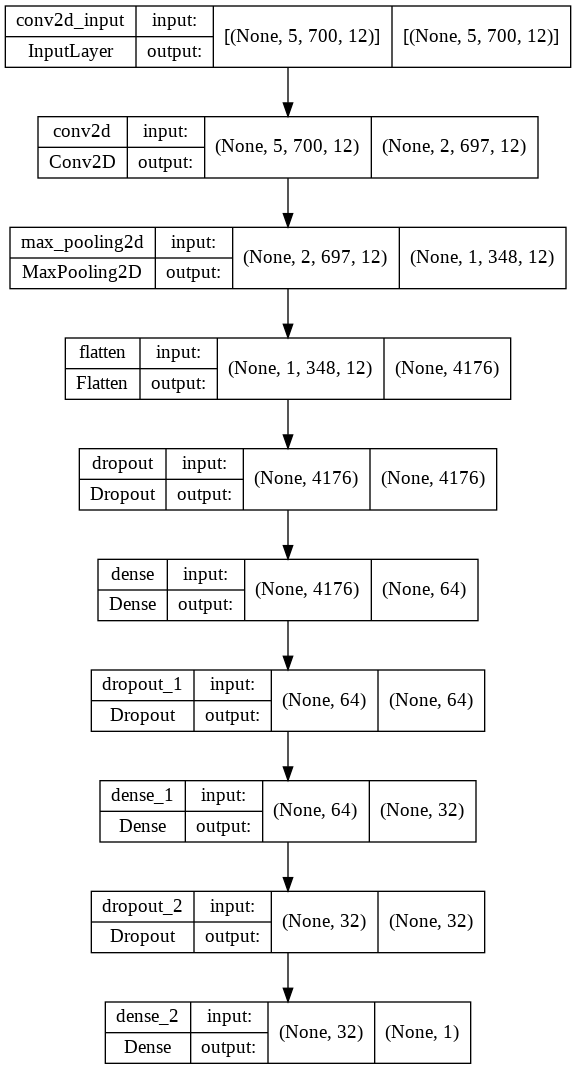

In [21]:
keras.utils.plot_model(model1, show_shapes=True)

In [22]:
model1.fit(
    X_train, y_train,
    batch_size=20,
    epochs=100,
    verbose=None
)
model1.predict = helper

In [23]:
from copy import deepcopy
preds1_test = model1.predict(X_test, 2, True)
preds1_train = model1.predict(X_train, 2)
y_train2 = deepcopy(y_train)
idx = np.argwhere(np.isnan(y_train2))
for i, v in enumerate(idx):
  y_train2 = np.delete(y_train2, v[0] - i)

In [32]:
total = 0
for p, v in zip(preds1_test, y_test):
  if v * 90 / 100 <= p <= v * 110 / 100:
    total += 1
testaccuracy = round(total / len(preds1_test), 3)
print('Testing Accuracy: ', testaccuracy)

Testing Accuracy:  0.571


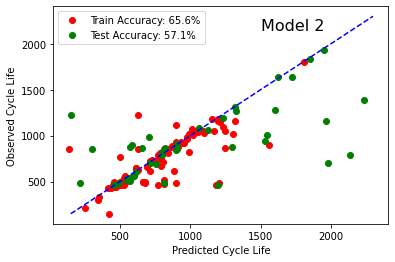

In [34]:
from matplotlib import pyplot as plt
xx = np.linspace(150, 2300,100)
yy = xx
plt.figure()
plt.plot(preds1_train, y_train2, 'ro')
plt.plot(preds1_test, y_test, 'go')
plt.plot(xx, yy, 'b--')
plt.xlabel('Predicted Cycle Life')
plt.ylabel('Observed Cycle Life')
plt.text(1500, 2150, 'Model 2', fontsize=16)
plt.legend(['Train Accuracy: 65.6%', 'Test Accuracy: 57.1%'])
plt.show()

In [35]:
model2 = Sequential()
model2.add(Conv2D(1, (5, 5), activation='tanh', input_shape=(5, 700, 12)))
model2.add(Flatten())
model2.add(Dense(32, activation='tanh'))
model2.add(Dropout(0.5))
model2.add(Dense(16, activation='tanh'))
model2.add(Dropout(0.5))
model2.add(Dense(1, activation='relu'))
opt = keras.optimizers.Adam(learning_rate=0.01, clipnorm=1)
model2.compile(
    loss='mean_absolute_error',
    optimizer=opt,
    metrics=['accuracy']
)
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 1, 696, 1)         301       
                                                                 
 flatten_1 (Flatten)         (None, 696)               0         
                                                                 
 dense_3 (Dense)             (None, 32)                22304     
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dropout_4 (Dropout)         (None, 16)                0         
                                                                 
 dense_5 (Dense)             (None, 1)                

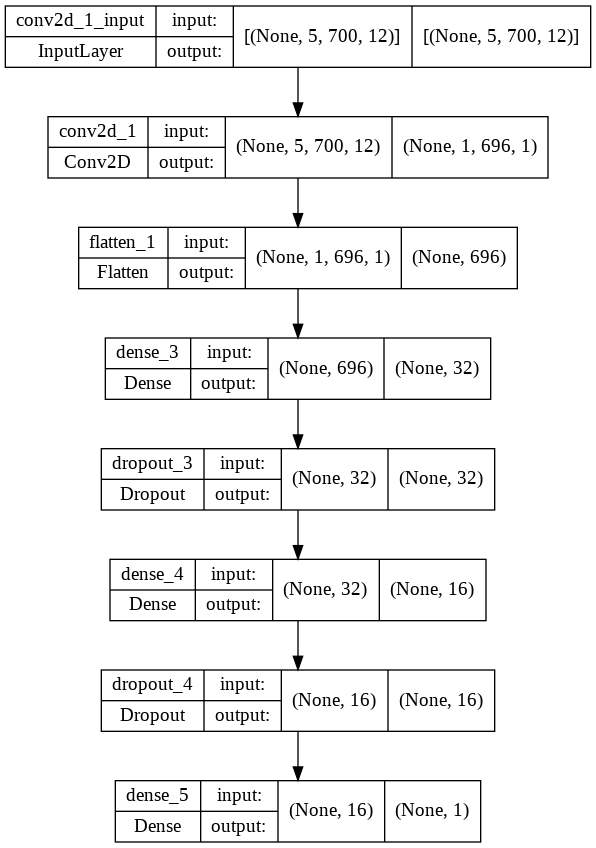

In [36]:
keras.utils.plot_model(model2, show_shapes=True)

In [37]:
model2.fit(
    X_train, y_train,
    batch_size=20,
    epochs=100,
    verbose=None
)

In [38]:
preds2_test = model2.predict(X_test, 3, True)
preds2_train = model2.predict(X_train, 3)
y_train2 = deepcopy(y_train)
idx = np.argwhere(np.isnan(y_train2))
for i, v in enumerate(idx):
  y_train2 = np.delete(y_train2, v[0] - i)

In [57]:
total = 0
for p, v in zip(preds2_test, y_test):
  if v * 90 / 100 <= p <= v * 110 / 100:
    total += 1
testaccuracy = round(total / len(preds2_test), 3)
print('Testing Accuracy: ', testaccuracy)

Testing Accuracy:  0.714


In [58]:
total = 0
for p, v in zip(preds2_train, y_train2):
  if v * 90 / 100 <= p <= v * 110 / 100:
    total += 1
trainaccuracy = round(total / len(preds2_train), 3)
print('Training Accuracy: ', trainaccuracy)

Training Accuracy:  0.854


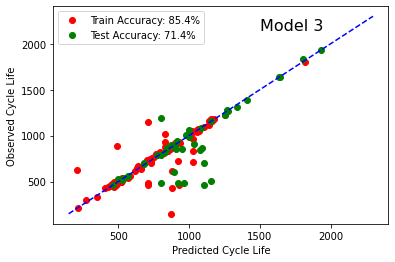

In [56]:
xx = np.linspace(150, 2300,100)
yy = xx
plt.figure()
plt.plot(preds2_train, y_train2, 'ro')
plt.plot(preds2_test, y_test, 'go')
plt.plot(xx, yy, 'b--')
plt.xlabel('Predicted Cycle Life')
plt.ylabel('Observed Cycle Life')
plt.text(1500, 2150, 'Model 3', fontsize=16)
plt.legend(['Train Accuracy: 85.4%', 'Test Accuracy: 71.4%'])
plt.show()